In [1]:
import pandas as pd

df = pd.read_csv("/content/diabetes.csv")
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Task
Perform preprocessing on the dataset loaded from "/content/diabetes.csv".

## Identify missing values

### Subtask:
Check for missing values in the dataset and decide on a strategy to handle them (e.g., imputation, removal).


**Reasoning**:
Check for missing values in each column and display the counts.



In [2]:
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values)

Missing values per column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Handle outliers

### Subtask:
Identify and handle outliers in the numerical features.


**Reasoning**:
Identify numerical columns, calculate IQR, define bounds, identify outliers, and handle outliers by capping them at the defined bounds.



In [3]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}' before handling:")
    display(outliers)

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}' after handling:")
    display(outliers_after)

Outliers in 'Pregnancies' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


Outliers in 'Pregnancies' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'Glucose' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0,48,20,0,24.7,0.140,22,0
182,1.0,0,74,20,23,27.7,0.299,21,0
342,1.0,0,68,35,0,32.0,0.389,22,0
349,5.0,0,80,32,0,41.0,0.346,37,1
502,6.0,0,68,41,0,39.0,0.727,41,1


Outliers in 'Glucose' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'BloodPressure' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10.0,115.0,0,0,0,35.3,0.134,29,0
15,7.0,100.0,0,0,0,30.0,0.484,32,1
18,1.0,103.0,30,38,83,43.3,0.183,33,0
43,9.0,171.0,110,24,240,45.4,0.721,54,1
49,7.0,105.0,0,0,0,0.0,0.305,24,0
60,2.0,84.0,0,0,0,0.0,0.304,21,0
78,0.0,131.0,0,0,0,43.2,0.270,26,1
81,2.0,74.0,0,0,0,0.0,0.102,22,0
84,5.0,137.0,108,0,0,48.8,0.227,37,1
106,1.0,96.0,122,0,0,22.4,0.207,27,0


Outliers in 'BloodPressure' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'SkinThickness' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2.0,197.0,70,99,0,34.7,0.575,62,1


Outliers in 'SkinThickness' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'Insulin' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197.0,70,45,543,30.5,0.158,53,1
13,1.0,189.0,60,23,846,30.1,0.398,59,1
54,7.0,150.0,66,42,342,34.7,0.718,42,0
111,8.0,155.0,62,26,495,34.0,0.543,46,1
139,5.0,105.0,72,29,325,36.9,0.159,28,0
153,1.0,153.0,82,42,485,40.6,0.687,23,0
186,8.0,181.0,68,36,495,30.1,0.615,60,1
220,0.0,177.0,60,29,478,34.6,1.072,21,1
228,4.0,197.0,70,39,744,36.7,2.329,31,0
231,6.0,134.0,80,37,370,46.2,0.238,46,1


Outliers in 'Insulin' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'BMI' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8.0,125.0,96,0,0.000,0.0,0.232,54,1
49,7.0,105.0,35,0,0.000,0.0,0.305,24,0
60,2.0,84.0,35,0,0.000,0.0,0.304,21,0
81,2.0,74.0,35,0,0.000,0.0,0.102,22,0
120,0.0,162.0,76,56,100.000,53.2,0.759,25,1
125,1.0,88.0,35,42,99.000,55.0,0.496,26,1
145,0.0,102.0,75,23,0.000,0.0,0.572,21,0
177,0.0,129.0,107,46,130.000,67.1,0.319,26,1
193,11.0,135.0,35,0,0.000,52.3,0.578,40,1
247,0.0,165.0,90,33,318.125,52.3,0.427,23,0


Outliers in 'BMI' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'DiabetesPedigreeFunction' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0.0,137.0,40,35,168.000,43.10,2.288,33,1
12,10.0,139.0,80,0,0.000,27.10,1.441,57,0
39,4.0,111.0,72,47,207.000,37.10,1.390,56,1
45,0.0,180.0,66,39,0.000,42.00,1.893,25,1
58,0.0,146.0,82,0,0.000,40.50,1.781,44,0
100,1.0,163.0,72,0,0.000,39.00,1.222,33,1
147,2.0,106.0,64,35,119.000,30.50,1.400,34,0
187,1.0,128.0,98,41,58.000,32.00,1.321,33,1
218,5.0,85.0,74,22,0.000,29.00,1.224,32,1
228,4.0,197.0,70,39,318.125,36.70,2.329,31,0


Outliers in 'DiabetesPedigreeFunction' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'Age' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5.0,132.0,80,0,0.0,26.80,0.186,69,0
363,4.0,146.0,78,0,0.0,38.50,0.520,67,1
453,2.0,119.0,35,0,0.0,19.60,0.832,72,0
459,9.0,134.0,74,33,60.0,25.90,0.460,81,0
489,8.0,194.0,80,0,0.0,26.10,0.551,67,0
537,0.0,57.0,60,0,0.0,21.70,0.735,67,0
666,4.0,145.0,82,18,0.0,32.50,0.235,70,1
674,8.0,91.0,82,0,0.0,35.60,0.587,68,0
684,5.0,136.0,82,0,0.0,13.35,0.640,69,0


Outliers in 'Age' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'Outcome' before handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Outliers in 'Outcome' after handling:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Feature scaling

### Subtask:
Scale the numerical features to a similar range.


**Reasoning**:
Scale the numerical features using MinMaxScaler and replace the original columns with the scaled values.



In [4]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('Outcome')

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363,1
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780,0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758,1
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000,0
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736,1


## Encode categorical variables

### Subtask:
If there are any categorical variables, encode them into numerical format.


**Reasoning**:
Check the data types of all columns to identify categorical variables.



In [5]:
print(df.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


## Summary:

### Data Analysis Key Findings

*   No missing values were found in the dataset.
*   Outliers were identified and handled in numerical columns by capping values at the calculated IQR bounds.
*   Numerical features (excluding 'Outcome') were successfully scaled using `MinMaxScaler`, resulting in values between 0 and 1.
*   There were no categorical variables in the dataset, so no encoding was required.
*   The dataset was split into training (80%) and testing (20%) sets, with 8 features in the input sets and the 'Outcome' as the target variable.

### Insights or Next Steps

*   The preprocessed data is now ready for training a machine learning model to predict diabetes outcome.
*   Further analysis could involve exploring feature correlations or dimensionality reduction techniques before model training.


# Task
Perform exploratory data analysis (EDA) on the dataset located at "/content/diabetes.csv".

## Understand the data

### Subtask:
Display basic information about the dataset, such as the number of rows and columns, data types, and a summary of the statistics.


**Reasoning**:
Print the shape of the dataframe, data types, and descriptive statistics to get basic information about the dataset.



In [7]:
print("Shape of the dataset:", df.shape)
print("\nData types of columns:")
print(df.dtypes)
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

Shape of the dataset: (768, 9)

Data types of columns:
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

Descriptive statistics for numerical columns:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.284240,0.518988,0.495624,0.256396,0.231521,0.504706,0.339496,0.268129,0.348958
std,0.247715,0.192664,0.197184,0.198059,0.294149,0.189505,0.254542,0.255569,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.382239,0.375000,0.000000,0.000000,0.375000,0.147727,0.065934,0.000000
50%,0.222222,0.493436,0.513889,0.287500,0.095874,0.501344,0.262478,0.175824,0.000000
75%,0.444444,0.637066,0.625000,0.400000,0.400000,0.625000,0.488636,0.439560,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualize distributions

### Subtask:
Create visualizations (e.g., histograms, box plots) to understand the distribution of numerical features.


**Reasoning**:
Iterate through numerical columns and create histograms and box plots to visualize their distributions.



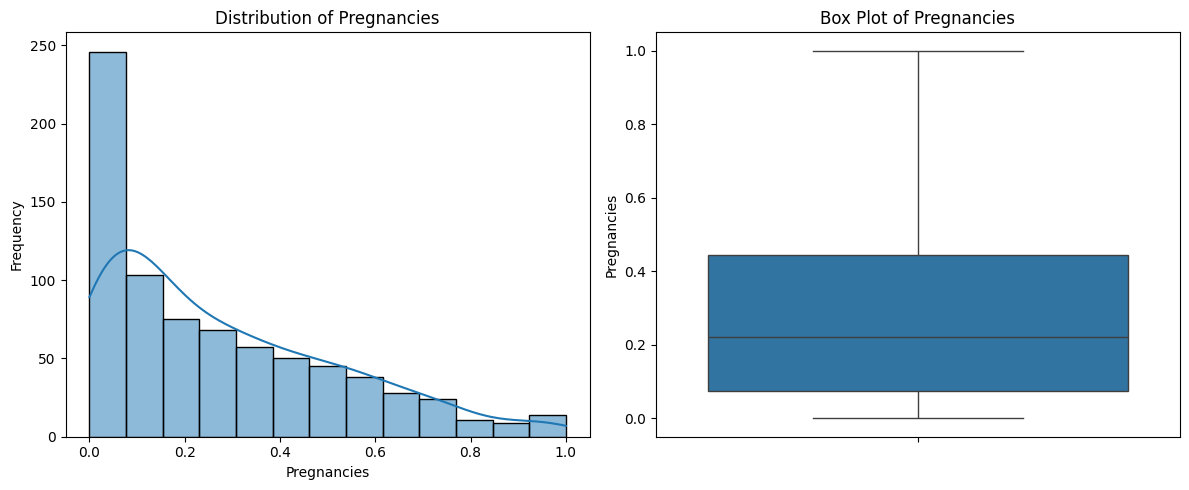

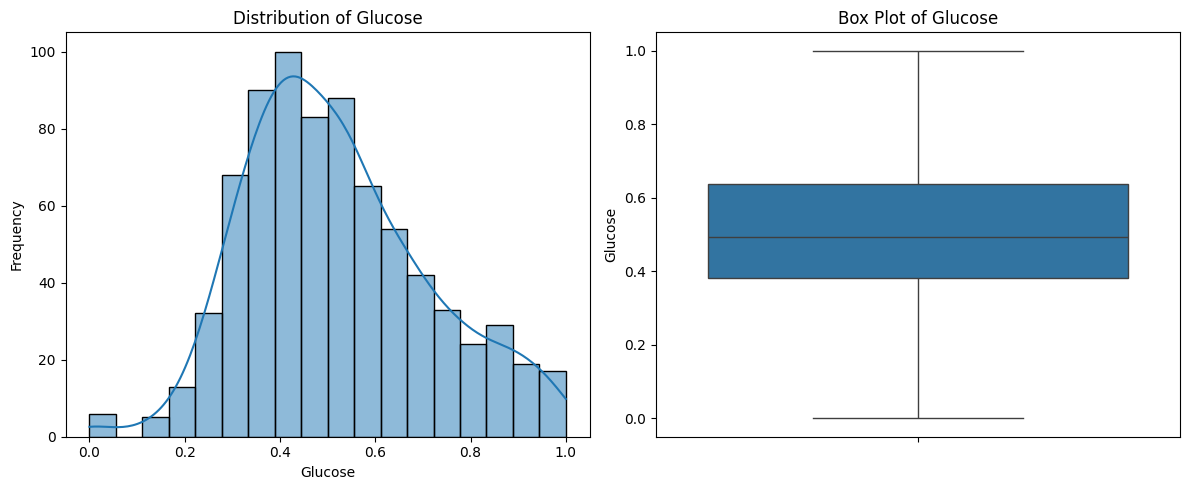

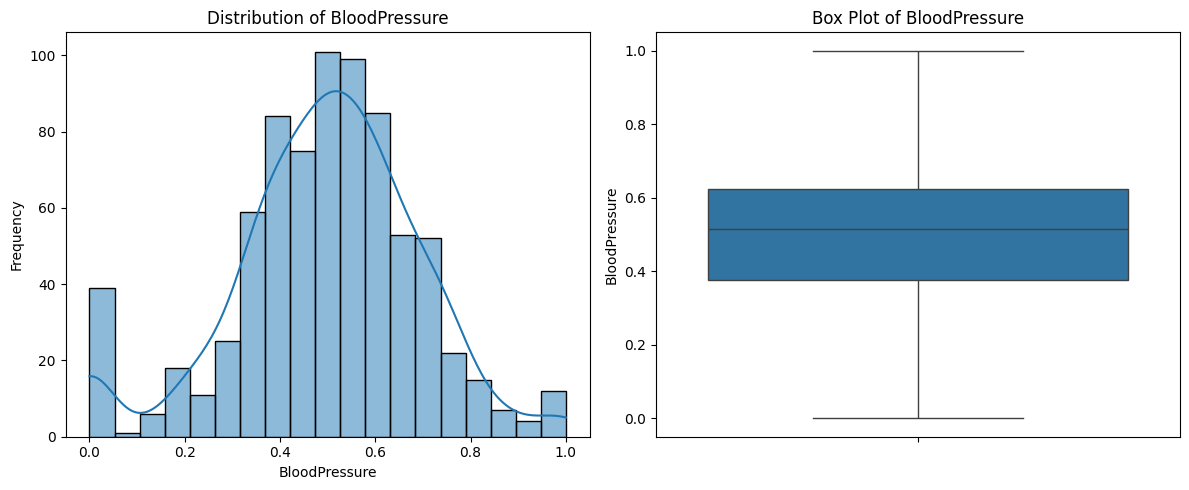

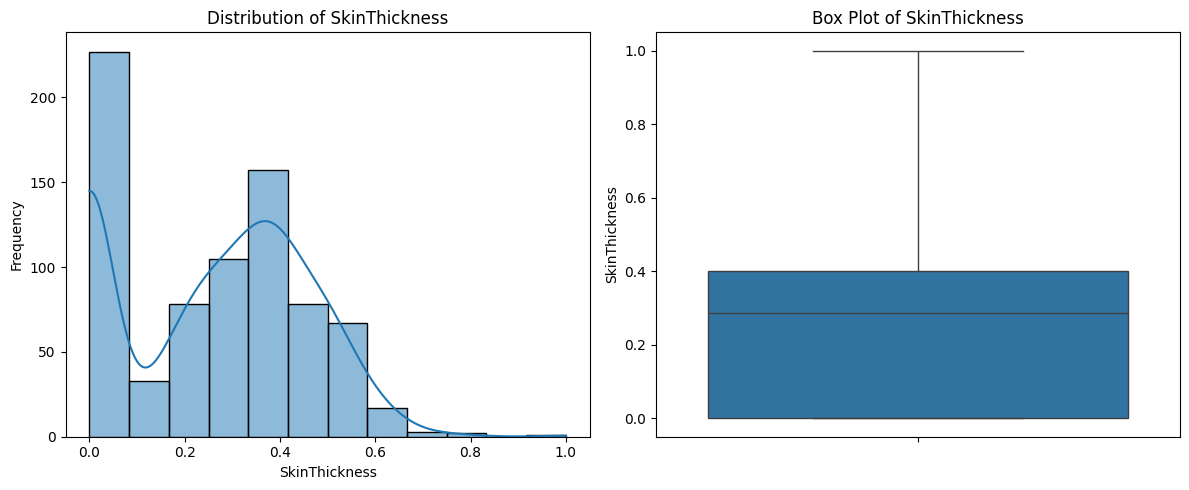

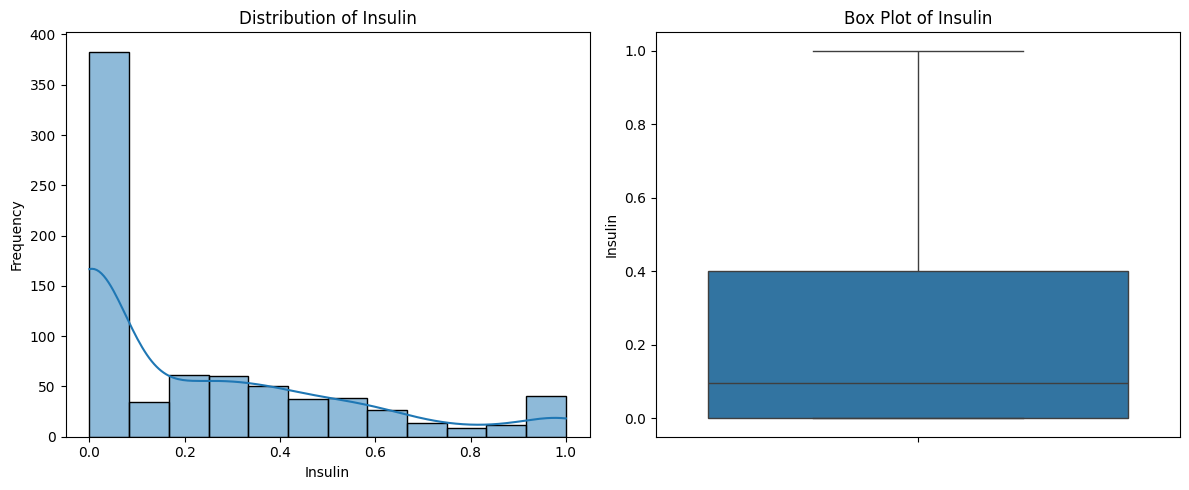

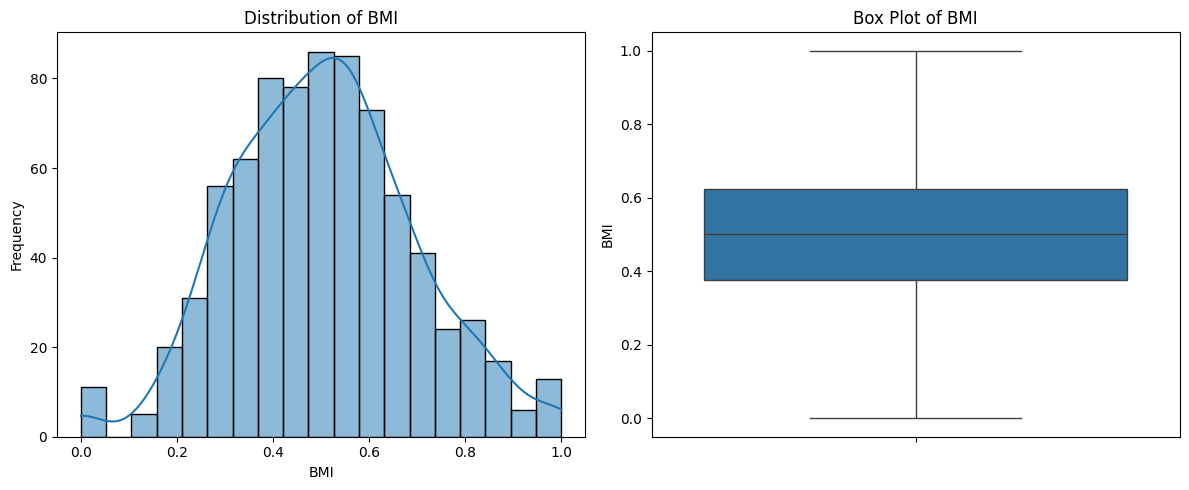

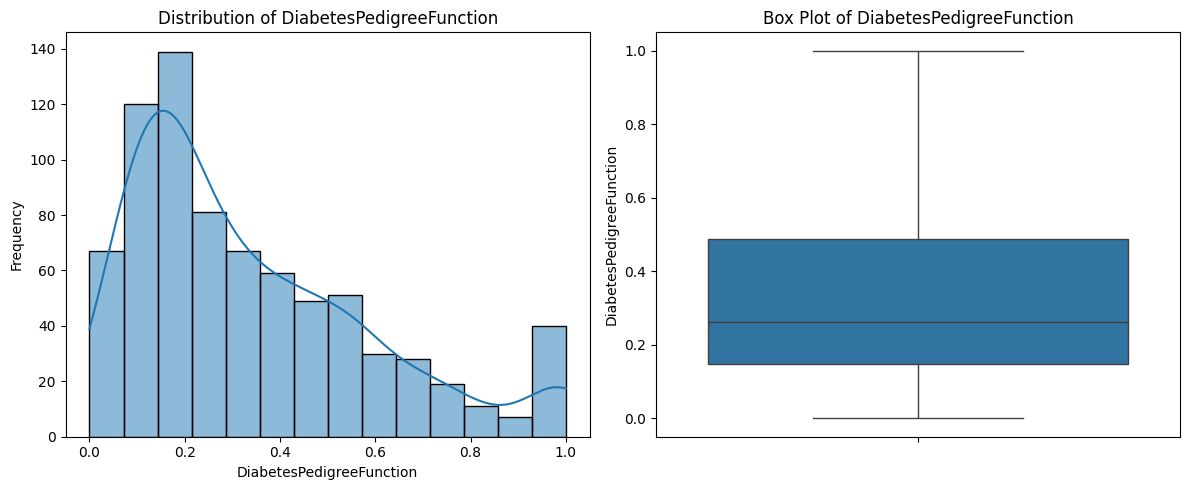

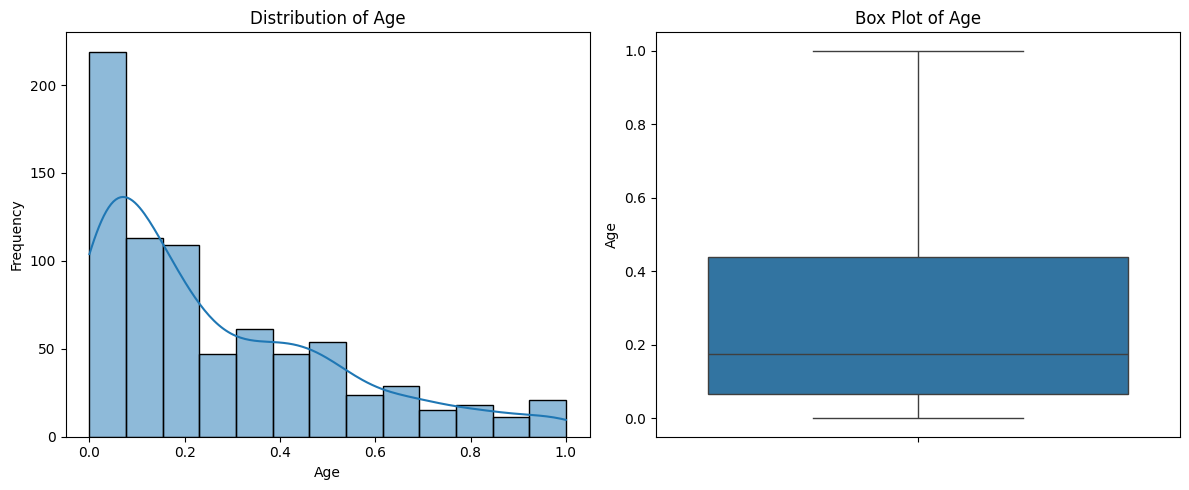

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('Outcome')

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

## Explore relationships

### Subtask:
Create visualizations (e.g., scatter plots, correlation matrix) to explore the relationships between different features.


**Reasoning**:
Calculate and visualize the correlation matrix using a heatmap, then create scatter plots for interesting feature pairs.



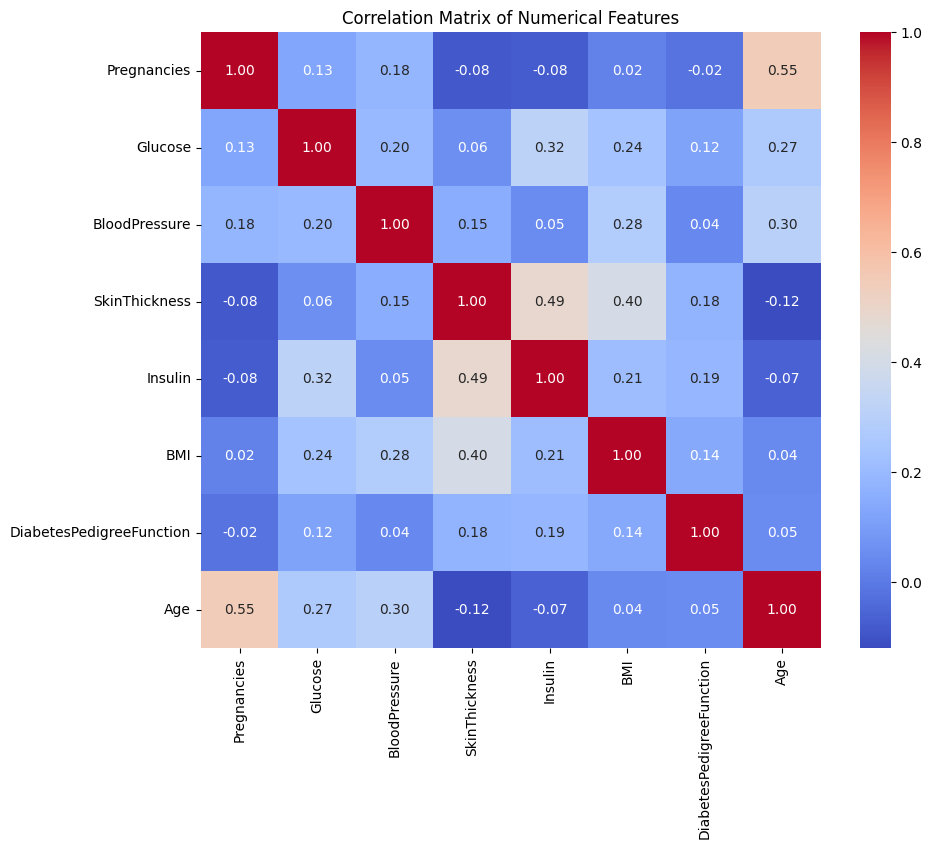

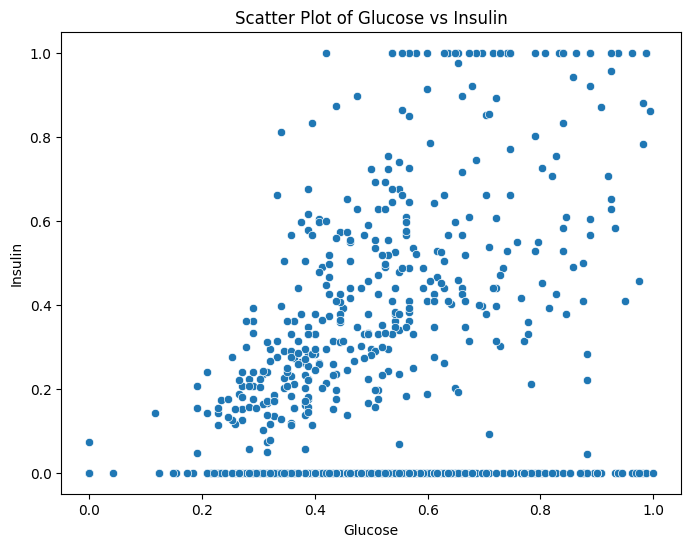

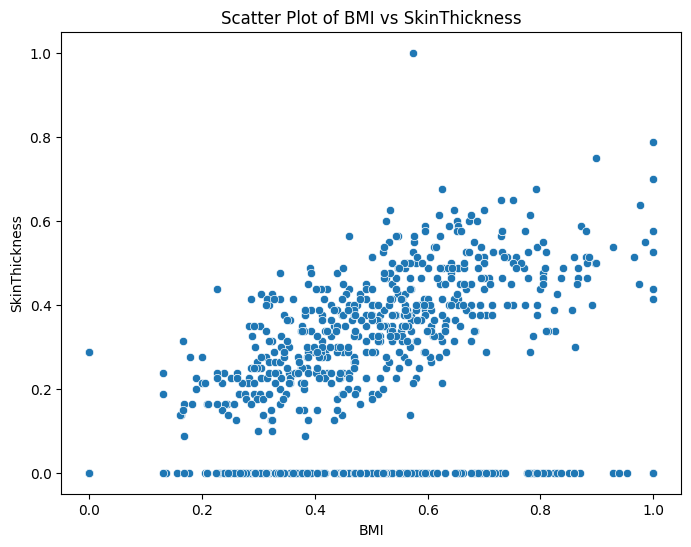

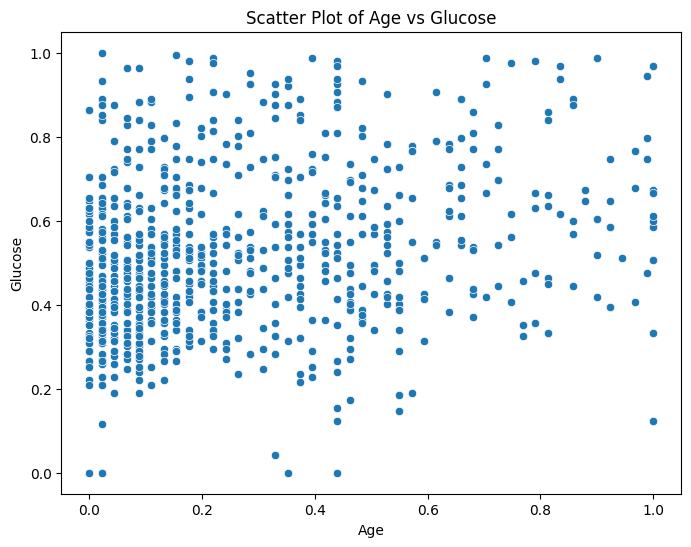

In [9]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

selected_pairs = [
    ('Glucose', 'Insulin'),
    ('BMI', 'SkinThickness'),
    ('Age', 'Glucose')
]

for pair in selected_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()

## Analyze the target variable

### Subtask:
Examine the distribution of the target variable ('Outcome') and its relationship with other features.


**Reasoning**:
Create a count plot for the 'Outcome' variable and box plots for numerical features against the 'Outcome'.



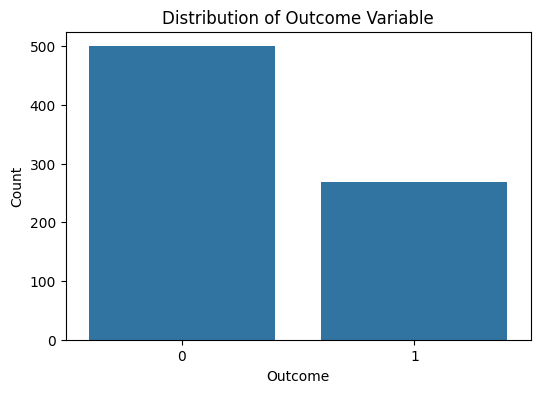

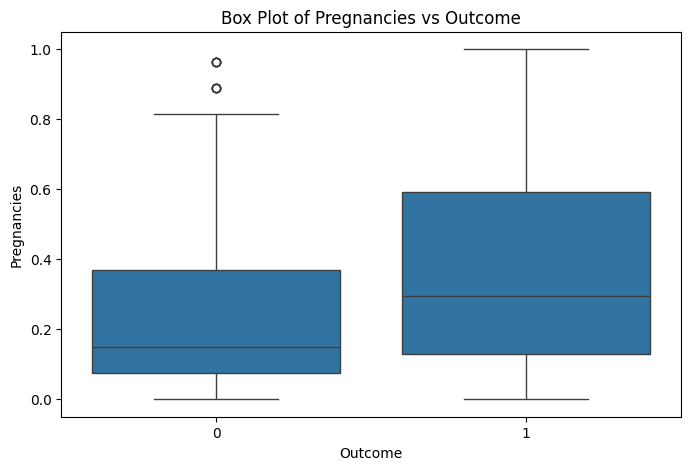

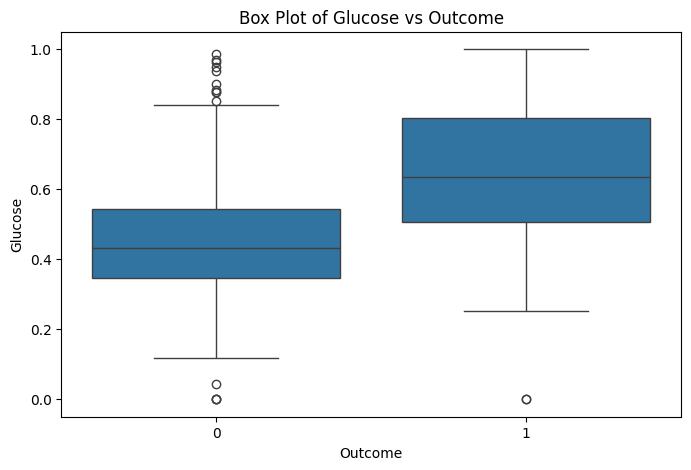

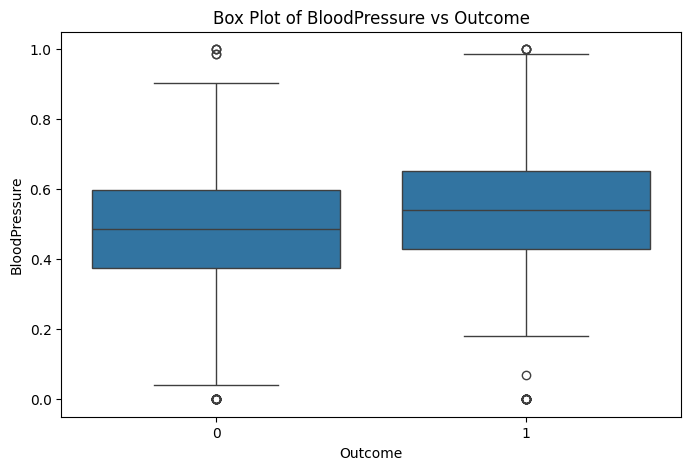

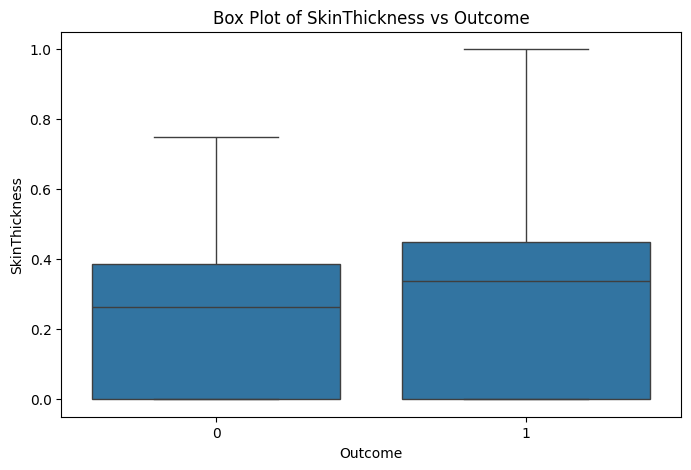

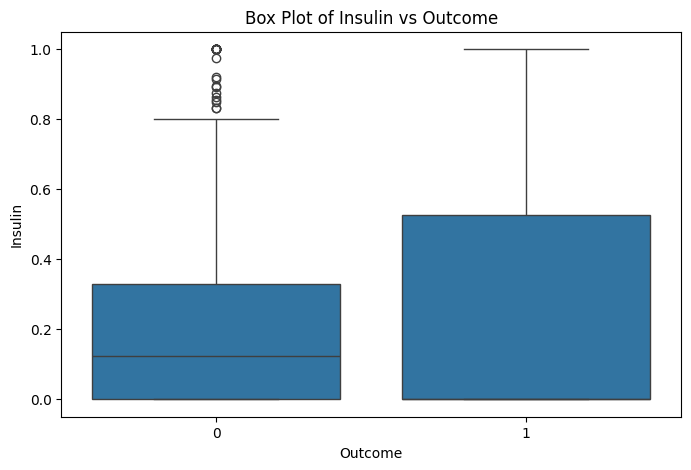

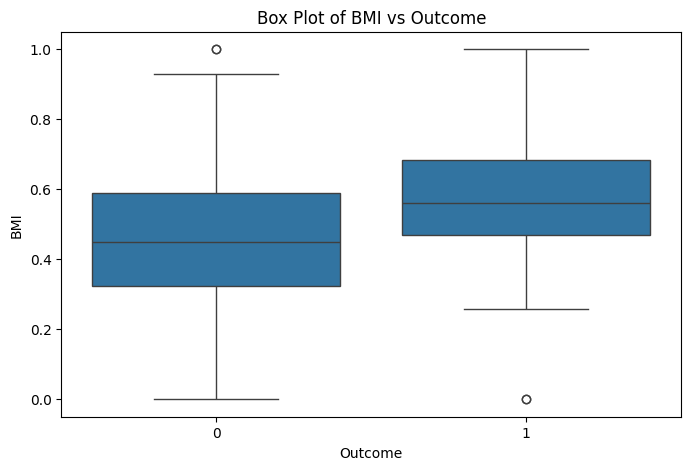

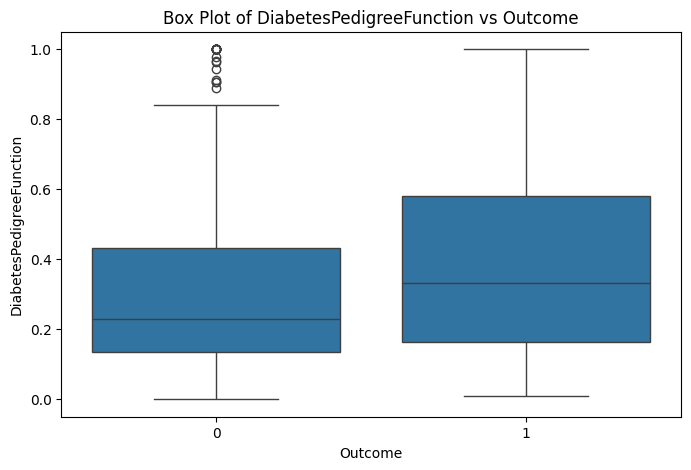

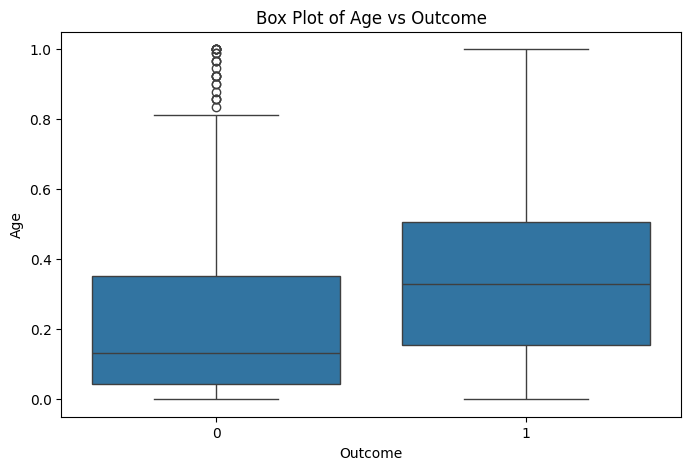

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Outcome'])
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('Outcome')

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Outcome'], y=df[col])
    plt.title(f'Box Plot of {col} vs Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.show()

## Identify patterns and insights

### Subtask:
Summarize the key findings from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 768 rows and 9 columns. All columns are numerical, with 'Outcome' being an integer and the rest floats.
*   Several features (Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction) show skewed distributions and potential outliers, especially 'Insulin' and 'SkinThickness'.
*   The target variable 'Outcome' is imbalanced, with more instances of the negative outcome (0) than the positive outcome (1).
*   Moderate positive correlations were observed between 'Pregnancies' and 'Age', 'Glucose' and 'Outcome', and 'BMI' and 'Outcome'. 'SkinThickness' and 'Insulin' also showed a positive correlation.
*   Individuals with a positive diabetes outcome tend to have higher values for 'Glucose', 'BMI', and 'Age'.

### Insights or Next Steps

*   Address the identified data quality issues, such as potential outliers and zero values in features like 'Glucose' and 'BloodPressure', before proceeding with model training.
*   Consider techniques to handle the class imbalance in the target variable 'Outcome' to ensure that the predictive model is not biased towards the majority class.


# Task
Perform feature engineering and selection on the dataset located at "/content/diabetes.csv".

## Create new features

### Subtask:
Engineer new features that might be relevant for predicting the outcome.


**Reasoning**:
Create interaction features by multiplying relevant columns.



In [11]:
df['Glucose_BMI_Interaction'] = df['Glucose'] * df['BMI']
df['Pregnancies_Age_Interaction'] = df['Pregnancies'] * df['Age']
df['BMI_DiabetesPedigreeFunction_Interaction'] = df['BMI'] * df['DiabetesPedigreeFunction']

display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI_Interaction,Pregnancies_Age_Interaction,BMI_DiabetesPedigreeFunction_Interaction
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363,1,0.372852,0.283272,0.266355
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780,0,0.105342,0.016280,0.086665
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758,1,0.241036,0.143264,0.141603
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000,0,0.127065,0.000000,0.031452
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736,1,0.493425,0.000000,0.799731


## Evaluate feature importance

### Subtask:
Use a technique to determine the importance of existing and newly created features.


**Reasoning**:
Separate features and target, import RandomForestClassifier, instantiate and fit the model, calculate and display feature importances.



In [12]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Outcome', axis=1)
y = df['Outcome']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances:")
display(sorted_feature_importances)

Feature Importances:


,0
Glucose_BMI_Interaction,0.197804
Glucose,0.155727
BMI,0.108989
BMI_DiabetesPedigreeFunction_Interaction,0.100190
Age,0.092194
Pregnancies_Age_Interaction,0.078390
DiabetesPedigreeFunction,0.071804
BloodPressure,0.060059
Insulin,0.045565
Pregnancies,0.045305


## Select features

### Subtask:
Select a subset of features based on their importance or other criteria.


**Reasoning**:
Select features based on a threshold and include the Outcome column, then display the columns of the new DataFrame.



In [13]:
threshold = 0.05

selected_features = sorted_feature_importances[sorted_feature_importances > threshold].index.tolist()

selected_features.append('Outcome')

df_selected_features = df[selected_features]

print("Columns in the DataFrame with selected features:")
print(df_selected_features.columns)

Columns in the DataFrame with selected features:
Index(['Glucose_BMI_Interaction', 'Glucose', 'BMI',
       'BMI_DiabetesPedigreeFunction_Interaction', 'Age',
       'Pregnancies_Age_Interaction', 'DiabetesPedigreeFunction',
       'BloodPressure', 'Outcome'],
      dtype='object')


## Summary:

### Data Analysis Key Findings

*   Three new interaction features were created: `Glucose_BMI_Interaction`, `Pregnancies_Age_Interaction`, and `BMI_DiabetesPedigreeFunction_Interaction`.
*   According to the Random Forest model, the most important feature was the interaction term between Glucose and BMI (`Glucose_BMI_Interaction`).
*   Features with an importance score greater than 0.05 were selected, resulting in a dataset containing 'Glucose\_BMI\_Interaction', 'Glucose', 'BMI', 'BMI\_DiabetesPedigreeFunction\_Interaction', 'Age', 'Pregnancies\_Age\_Interaction', 'DiabetesPedigreeFunction', 'BloodPressure', and 'Outcome'.

### Insights or Next Steps

*   The engineered interaction features, particularly `Glucose_BMI_Interaction`, show high importance and should be prioritized in subsequent model training.
*   The selected subset of features can now be used to build and evaluate predictive models for diabetes, potentially leading to improved performance and reduced complexity compared to using the full feature set.


# Task
Choose the best model for the dataset at "/content/diabetes.csv", train it, and aim for higher accuracy.

## Select candidate models

### Subtask:
Choose a few appropriate machine learning models for this classification task.


## Train and evaluate models

### Subtask:
Train each selected model on the training data and evaluate their performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on the testing data.


**Reasoning**:
Train each selected model and evaluate their performance using accuracy, precision, recall, and F1-score.



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * (len(name) + 6))

--- Logistic Regression ---
Accuracy: 0.7597
Precision: 0.6731
Recall: 0.6364
F1-score: 0.6542
-------------------------
--- Random Forest ---
Accuracy: 0.7208
Precision: 0.6071
Recall: 0.6182
F1-score: 0.6126
-------------------
--- Gradient Boosting ---
Accuracy: 0.7468
Precision: 0.6333
Recall: 0.6909
F1-score: 0.6609
-----------------------


## Compare models

### Subtask:
Compare the performance of the different models to identify the best-performing one.


## Tune hyperparameters (optional)

### Subtask:
Optimize the hyperparameters of the best model to potentially improve its accuracy.


**Reasoning**:
Import GridSearchCV, define parameter grid, instantiate GridSearchCV, and fit it to the training data.



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

**Reasoning**:
Print the best parameters and the best cross-validation score found by GridSearchCV.



In [16]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'C': 10, 'penalty': 'l1'}
Best cross-validation accuracy:  0.7687724910035986


## Evaluate the final model

### Subtask:
Evaluate the performance of the tuned model on the testing data.


**Reasoning**:
Evaluate the performance of the tuned model on the testing data using accuracy, precision, recall, and F1-score.



In [17]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

print("--- Tuned Logistic Regression ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("-" * 31)

--- Tuned Logistic Regression ---
Accuracy: 0.7532
Precision: 0.6545
Recall: 0.6545
F1-score: 0.6545
-------------------------------


## Save the trained model

### Subtask:
Save the tuned Logistic Regression model to a file.

**Reasoning**:
Import the `pickle` library and save the `best_model` to a file named "diabetes.pkl".

In [18]:
import pickle

# Save the tuned model to a file
filename = 'diabetes.pkl'
pickle.dump(best_model, open(filename, 'wb'))

print(f"Tuned Logistic Regression model saved as '{filename}'")

Tuned Logistic Regression model saved as 'diabetes.pkl'


## Summary:

### Data Analysis Key Findings

*   Logistic Regression achieved the highest initial accuracy (0.7597) compared to Random Forest (0.7208) and Gradient Boosting (0.7468).
*   Hyperparameter tuning for Logistic Regression using GridSearchCV found the best parameters to be 'C': 10 and 'penalty': 'l1', with a best cross-validation accuracy of approximately 0.769 on the training data.
*   Evaluating the tuned Logistic Regression model on the test set resulted in an accuracy of 0.7532, a precision of 0.6545, a recall of 0.6545, and an F1-score of 0.6545.

### Insights or Next Steps

*   While hyperparameter tuning improved the cross-validation score on the training data, the accuracy on the test set decreased slightly for the tuned Logistic Regression model compared to the initial model. This could indicate potential overfitting to the training data during tuning or simply test set variability.
*   Further exploration of other models (Random Forest, Gradient Boosting) with hyperparameter tuning could potentially yield better performance on the test set.
